# BT02: Khám phá dữ liệu, tiền xử lý, phân tích đơn giản
(Cập nhật 14/11/2020)

Họ tên: Cao Tất Cường

MSSV: 18120296

---

## Cách làm bài và nộp bài
&#9889; Bạn lưu ý là mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.


*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>. Bạn có thể thảo luận ý tưởng với bạn khác, nhưng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font>. <font color=red>Nếu vi phạm thì sẽ bị 0 điểm cho toàn bộ môn học.</font>*

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `BT02-KhamPha_TienXuLy_PhanTich.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. <font color=red>Bạn lưu ý tuân thủ chính xác cấu trúc này.</font>

---

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
# YOUR CODE HERE (OPTION) 
# Nếu cần các thư viện khác thì bạn có thể import ở đây

---

## Thu thập dữ liệu

Dữ liệu được sử dụng trong bài tập này là dữ liệu khảo sát các lập trình viên của trang StackOverflow. Mình download dữ liệu [ở đây](https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB/view) và có bỏ đi một số cột để đơn giản hóa. 

Theo mô tả trong file "README_2020.txt" của StackOverflow:
>The enclosed data set is the full, cleaned results of the 2020 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are three files besides this README:
>
>1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
>2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
>3. so_survey_2020.pdf - PDF file of survey instrument
>
>The survey was fielded from February 5 to February 28, 2020. The median time spent on the survey for qualified responses was 16.6 minutes.
>
>Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

File "survey_results_public-short.csv" mà mình đính kèm là phiên bản đơn giản hóa của file "survey_results_public.csv" (từ 61 cột, mình bỏ xuống còn 29 cột). Đây là file dữ liệu chính mà bạn sẽ làm trong bài tập này. Ngoài ra, mình còn đính kèm 2 file phụ: (1) file "survey_results_schema-short.csv" là file cho biết ý nghĩa của các cột, và (2) file "so_survey_2020.pdf" là file khảo sát gốc của StackOverflow.

Để ý: 
- Dữ liệu này không đại diện được cho cộng đồng lập trình viên trên toàn thế giới, mà chỉ giới hạn trong tập những lập trình viên thực hiện khảo sát của StackOverflow. Những câu trả lời có được thông qua tập dữ liệu này cũng sẽ bị giới hạn trong phạm vi đó.
- Dữ liệu có đúng không? Về cơ bản là ta không biết được. Ở đây, mục đích chính là học qui trình Khoa Học Dữ Liệu và các câu lệnh của Pandas nên ta sẽ **giả định** phần lớn dữ liệu là đúng và tiếp tục làm.

Cũng theo file "README_2020.txt", dữ liệu này được StackOverflow public với license như sau:
>This database - The Public 2020 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/
>
>TLDR: You are free to share, adapt, and create derivative works from The Public 2020 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.


---

## Khám phá dữ liệu

### Đọc dữ liệu từ file (0.25đ)

Đầu tiên, bạn viết code để đọc dữ liệu từ file "survey_results_public-short.csv" và lưu kết quả vào DataFrame `survey_df`. Ngoài ra, bạn cũng cần cho cột `Respondent` (id của người làm khảo sát) làm cột index của `survey_df`.

In [2]:
# YOUR CODE HERE
survey_df = pd.read_csv("survey_results_public-short.csv", index_col="Respondent")

In [3]:
# TEST
survey_df.head()

,MainBranch,Hobbyist,Age,ConvertedComp,Country,DevType,EdLevel,Employment,Ethnicity,Gender,...,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,OpSys,PlatformDesireNextYear,PlatformWorkedWith,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,NaN,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,...,Fairly important,Once a year,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,50.0,36,27
2,I am a developer by profession,No,NaN,NaN,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,...,Fairly important,Once a year,NaN,Visit Stack Overflow;Go for a walk or other ph...,MacOS,iOS;Kubernetes;Linux;MacOS,iOS,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,...,NaN,Once a decade,NaN,NaN,Linux-based,NaN,NaN,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,NaN,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,...,Not at all important/not necessary,Once a year,Occasionally: 1-2 days per quarter but less th...,NaN,Linux-based,NaN,NaN,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,NaN,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,...,Very important,Once a year,NaN,Call a coworker or friend;Visit Stack Overflow...,Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,NaN,15,8


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột? (0.25đ)

Kế đến, bạn tính số dòng và số cột của DataFrame `survey_df` và lưu vào biến `shape` (tuple). 

In [4]:
# YOUR CODE HERE
shape = survey_df.shape

In [5]:
# TEST
assert shape == (64461, 28)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo file "README_2020.txt" cũng như theo quan sát sơ bộ về dữ liệu, mỗi dòng trong DataFrame `survey_df` cho biết kết quả làm khảo sát của một người. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau (lúc sau, nếu phát hiện ra vấn đề thì ta sẽ quay lại đây). 

### Dữ liệu có các dòng bị lặp không? (0.25đ)

Kế đến, bạn tính số dòng có index (id của người làm khảo sát) bị lặp và lưu vào biến `num_duplicated_rows`. Trong nhóm các dòng có index giống nhau thì dòng đầu tiên không tính là bị lặp.

In [6]:
# YOUR CODE HERE
num_duplicated_rows = survey_df.index.duplicated().sum()

In [7]:
# TEST
assert num_duplicated_rows == 0

### Mỗi cột có ý nghĩa gì? (0.25đ)

Để xem ý nghĩa của mỗi cột thì:
- Trước tiên, bạn cần đọc file "survey_results_schema-short.csv" vào DataFrame `col_meaning_df`; bạn cũng cần cho cột "Column" làm cột index. 
- Sau đó, bạn chỉ cần hiển thị DataFrame `col_meaning_df` ra để xem (vụ này khó nên ở dưới mình đã làm cho bạn ở cell có dòng "# TEST" 😉). Tuy nhiên, bạn sẽ thấy ở cột "QuestionText": các chuỗi mô tả bị cắt do quá dài. Do đó, trước khi hiển thị DataFrame `col_meaning_df`, bạn cũng cần chỉnh sao đó để các chuỗi mô tả không bị cắt (vụ này bạn tự search Google, gợi ý: bạn sẽ dùng đến câu lệnh `pd.set_option`).   

In [8]:
# YOUR CODE HERE
col_meaning_df = pd.read_csv("survey_results_schema-short.csv", index_col="Column")
pd.set_option('display.max_colwidth', None)

In [9]:
# TEST
col_meaning_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order of survey response time)
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Hobbyist,Do you code as a hobby?
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
Country,Where do you live?
DevType,Which of the following describe you? Please select all that apply.
EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
Employment,Which of the following best describes your current employment status?


Trước khi đi tiếp, bạn nên đọc kết quả hiển thị ở trên và đảm bảo là bạn đã hiểu ý nghĩa của các cột. Để hiểu ý nghĩa của cột, có thể bạn sẽ cần xem thêm các giá trị của cột bên DataFrame `survey_df`. 

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? (0.25đ)

Kế đến, bạn tính kiểu dữ liệu (dtype) của mỗi cột trong DataFrame `survey_df` và lưu kết quả vào Series `dtypes` (Series này có index là tên cột). 

In [10]:
# YOUR CODE HERE
dtypes = survey_df.dtypes
dtypes

MainBranch                       object
Hobbyist                         object
Age                             float64
ConvertedComp                   float64
Country                          object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object
NEWCollabToolsDesireNextYear     object
NEWCollabToolsWorkedWith         object
NEWEdImpt                        object
NEWLearn                         object
NEWOvertime                      object
NEWStuck                         object
OpSys                            object
PlatformDesireNextYear           object
PlatformWorkedWith               object


In [11]:
# TEST
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert float_cols == {'Age', 'ConvertedComp', 'WorkWeekHrs'}
object_cols = set(dtypes[dtypes == object].index)
assert len(object_cols) == 25

Như bạn có thể thấy, cột "YearsCode" và "YearsCodePro" nên có kiểu dữ liệu số, nhưng hiện giờ đang có kiểu dữ liệu object. Ta hãy thử xem thêm về các giá trị 2 cột này. 

In [12]:
survey_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [13]:
survey_df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

Ta nên đưa 2 cột này về dạng số để có thể tiếp tục khám phá (tính min, median, max, ...).

---

## Tiền xử lý (0.5đ)

Bạn sẽ thực hiện tiền xử lý để chuyển 2 cột "YearsCode" và "YearsCodePro" về dạng số (float). Trong đó: "Less than 1 year" $\to$ 0, "More than 50 years" $\to$ 51. Sau khi chuyển thì `survey_df.dtypes` sẽ thay đổi.

In [14]:
# YOUR CODE HERE
survey_df[['YearsCode','YearsCodePro']] = survey_df[['YearsCode','YearsCodePro']].replace(['Less than 1 year','More than 50 years'],[0,51])
survey_df[['YearsCode','YearsCodePro']] = survey_df[['YearsCode','YearsCodePro']].apply(pd.to_numeric)
survey_df.dtypes

MainBranch                       object
Hobbyist                         object
Age                             float64
ConvertedComp                   float64
Country                          object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object
NEWCollabToolsDesireNextYear     object
NEWCollabToolsWorkedWith         object
NEWEdImpt                        object
NEWLearn                         object
NEWOvertime                      object
NEWStuck                         object
OpSys                            object
PlatformDesireNextYear           object
PlatformWorkedWith               object


In [15]:
# TEST
assert survey_df['YearsCode'].dtype in [np.float32, np.float64]
assert survey_df['YearsCodePro'].dtype in [np.float32, np.float64]

---

## Quay lại bước khám phá dữ liệu 

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào? (1đ)

(Trong đó: phần tính các mô tả của mỗi cột chiếm 0.5đ, phần tính số lượng giá trị không hợp lệ của mỗi cột chiếm 0.5đ)

Với các cột có kiểu dữ liệu số, bạn sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Bạn sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [16]:
# YOUR CODE HERE
num_col_info_df = survey_df.select_dtypes(include=["float32","float64"])
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def min(df):
    return df.quantile(0).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
def max(df):
    return df.quantile(1)
num_col_info_df = num_col_info_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])
num_col_info_df

,Age,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
missing_ratio,29.5,46.1,36.2,10.5,28.1
min,1.0,0.0,1.0,0.0,0.0
lower_quartile,24.0,24648.0,40.0,6.0,3.0
median,29.0,54049.0,40.0,10.0,6.0
upper_quartile,35.0,95000.0,44.0,17.0,12.0
max,279.0,2000000.0,475.0,51.0,51.0


In [17]:
# TEST
assert num_col_info_df.shape == (6, 5)
data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['Age', 'ConvertedComp', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']].values
correct_data = np.array([[     29.5,      46.1,      36.2,      10.5,      28.1],
                         [      1. ,       0. ,       1. ,       0. ,       0. ],
                         [     24. ,   24648. ,      40. ,       6. ,       3. ],
                         [     29. ,   54049. ,      40. ,      10. ,       6. ],
                         [     35. ,   95000. ,      44. ,      17. ,      12. ],
                         [    279. , 2000000. ,     475. ,      51. ,      51. ]])
assert np.array_equal(data, correct_data)

**Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**
- Cột "Age": bạn hãy tính số lượng giá trị không hợp lệ của cột "Age" (< giá trị tương ứng trong cột "YearsCode" HOẶC < giá trị tương ứng trong cột "YearsCodePro") và lưu kết quả vào biến `num_invalid_Age_vals`.
- Cột "WorkWeekHrs" (số giờ làm việc trung bình một tuần): ta thấy max là 475 giờ! Trong khi đó, 7 ngày * 24 giờ = 168 giờ! Bạn hãy tính số lượng giá trị không hợp lệ của cột "WorkWeekHrs" (> 24 * 7) và lưu kết quả vào biến `num_invalid_WorkWeekHrs`.
- Cột "YearsCode": bạn hãy tính số lượng giá trị không hợp lệ của cột "YearsCode" (< giá trị tương ứng trong cột "YearsCodePro" HOẶC > giá trị tương ứng trong cột "Age") và lưu kết quả vào biến `num_invalid_YearsCode`.
- Cột "YearsCodePro": bạn hãy tính số lượng giá trị không hợp lệ của cột "YearsCodePro" (> giá trị tương ứng trong cột "YearsCode" HOẶC > giá trị tương ứng trong cột "Age") và lưu kết quả vào biến `num_invalid_YearsCodePro`.

In [18]:
# YOUR CODE HERE
# Tính số lượng giá trị không hợp lệ đồng tời lưu các chỉ số của các dòng không hợp lệ vào index_row_mising
num_invalid_Age_vals = survey_df[(survey_df['Age'] < survey_df['YearsCode']) | 
                                     (survey_df['Age'] < survey_df['YearsCodePro'])]
index_row_mising = num_invalid_Age_vals.index
num_invalid_Age_vals = len(num_invalid_Age_vals)

num_invalid_WorkWeekHrs_vals = survey_df[survey_df['WorkWeekHrs'] > 168]
index_row_mising = index_row_mising.append(num_invalid_WorkWeekHrs_vals.index)
num_invalid_WorkWeekHrs_vals = len(num_invalid_WorkWeekHrs_vals)

num_invalid_YearsCode_vals = survey_df[(survey_df['YearsCode'] < survey_df['YearsCodePro']) | 
                                           (survey_df['YearsCode'] > survey_df['Age'])]
index_row_mising = index_row_mising.append(num_invalid_YearsCode_vals.index)
num_invalid_YearsCode_vals = len(num_invalid_YearsCode_vals)

num_invalid_YearsCodePro_vals = survey_df[(survey_df['YearsCodePro'] > survey_df['YearsCode']) | 
                                           (survey_df['YearsCodePro'] > survey_df['Age'])]
index_row_mising = index_row_mising.append(num_invalid_YearsCodePro_vals.index)
num_invalid_YearsCodePro_vals = len(num_invalid_YearsCodePro_vals)

In [19]:
# TEST
assert num_invalid_WorkWeekHrs_vals == 62
assert num_invalid_Age_vals == 16
assert num_invalid_YearsCode_vals == 499
assert num_invalid_YearsCodePro_vals == 486

Do số lượng các giá trị không hợp lệ cũng khá ít nên ta có thể tiền xử lý bằng cách xóa các dòng chứa các giá trị không hợp lệ.

---

## Tiền xử lý (0.5đ)

Bạn sẽ thực hiện tiền xử lý để xóa đi các dòng của DataFrame `survey_df` mà chứa ít nhất là một giá trị không hợp lệ. Sau khi tiền xử lý thì `survey_df` sẽ thay đổi. 

In [20]:
# YOUR CODE HERE
# Dùng set để loại bỏ các phần tử trùng nhau
survey_df.drop(list(set(index_row_mising)), inplace=True)

In [21]:
# TEST
assert len(survey_df) == 63900

---

## Quay lại bước khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào? (1đ)

Với các cột có kiểu dữ liệu không phải số, bạn sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà ứng với câu hỏi dạng multichoice (ví dụ, cột "DevType"), mỗi giá trị có thể chứa nhiều choice (các choice được phân tách bởi dấu chấm phẩy), và việc đếm trực tiếp các giá trị không có nhiều ý nghĩa lắm vì số lượng tổ hợp các choice là khá nhiều; một cách khác tốt hơn mà bạn sẽ làm là đếm số lượng các choice
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %; với cột mà ứng với câu hỏi dạng multichoice, cách làm tương tự như ở trên

Bạn sẽ lưu kết quả vào DataFrame `cat_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột không phải số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

Gợi ý: có thể bạn sẽ muốn dùng [phương thức `explode`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html).

In [22]:
# Các cột ứng với câu hỏi khảo sát multichoice
multichoice_cols = ['DevType', 'Gender', 'JobFactors', 
                    'LanguageWorkedWith', 'LanguageDesireNextYear', 
                    'MiscTechWorkedWith', 'MiscTechDesireNextYear', 
                    'NEWCollabToolsWorkedWith', 'NEWCollabToolsDesireNextYear', 
                    'PlatformWorkedWith', 'PlatformDesireNextYear', 
                    'NEWStuck']

In [23]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
# split(';') để tách các lựa chọn và dùng explode
# chuyển đổi từng phần tử của một danh sách thành một hàng, index là giá trị của index ban đầu
df = survey_df.select_dtypes(include='object')
def num_values(col):
    if col.name in multichoice_cols:
        return col.str.split(';').explode().nunique()
    else:
        return col.nunique()
    
def value_ratios(col):
    if col.name in multichoice_cols:
        values = col.str.split(';').explode().value_counts().sum()
        return dict(((col.str.split(';').explode().value_counts() / values) * 100).round(1))
    else:   
        values = col.notnull().sum()
        return dict(((col.value_counts() / values) * 100).round(1))

cat_col_info_df = df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,MainBranch,Hobbyist,Country,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,OpSys,PlatformDesireNextYear,PlatformWorkedWith
missing_ratio,0.5,0.1,0.6,23.6,11,0.9,28.6,21.5,23.4,30.1,16,11,34.3,37.5,26.6,18,25,12.9,33.1,14.7,12.8,21.5,16.5
num_values,5,2,183,23,9,7,204,3,11,5,25,25,19,19,11,11,5,4,5,9,4,16,16
value_ratios,"{'I am a developer by profession': 73.5, 'I am a student who is learning to code': 12.5, 'I am n...","{'Yes': 78.2, 'No': 21.8}","{'United States': 19.5, 'India': 13.0, 'United Kingdom': 6.1, 'Germany': 6.1, 'Canada': 3.4, 'Fr...","{'Developer, back-end': 17.4, 'Developer, full-stack': 17.3, 'Developer, front-end': 11.7, 'Deve...","{'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 46.3, 'Master’s degree (M.A., M.S., M.Eng., MBA...","{'Employed full-time': 70.8, 'Student': 12.3, 'Independent contractor, freelancer, or self-emplo...","{'White or of European descent': 64.0, 'South Asian': 9.7, 'Hispanic or Latino/a/x': 4.9, 'Black...","{'Man': 90.8, 'Woman': 7.9, 'Non-binary, genderqueer, or gender non-conforming': 1.2}","{'Languages, frameworks, and other technologies I’d be working with': 17.5, 'Office environment ...","{'Very satisfied': 32.4, 'Slightly satisfied': 30.9, 'Slightly dissatisfied': 15.8, 'Neither sat...","{'Python': 11.2, 'JavaScript': 11.0, 'HTML/CSS': 8.7, 'SQL': 8.4, 'TypeScript': 7.2, 'C#': 5.7, ...","{'JavaScript': 13.5, 'HTML/CSS': 12.6, 'SQL': 10.9, 'Python': 8.8, 'Java': 8.0, 'Bash/Shell/Powe...","{'Node.js': 17.0, 'TensorFlow': 10.1, '.NET Core': 9.6, 'React Native': 8.4, '.NET': 6.9, 'Flutt...","{'Node.js': 23.1, '.NET': 15.7, '.NET Core': 12.0, 'Pandas': 7.0, 'TensorFlow': 5.2, 'React Nati...","{'Github': 24.7, 'Slack': 14.1, 'Gitlab': 11.3, 'Google Suite (Docs, Meet, etc)': 10.6, 'Jira': ...","{'Github': 22.2, 'Slack': 14.2, 'Jira': 12.8, 'Google Suite (Docs, Meet, etc)': 11.1, 'Gitlab': ...","{'Fairly important': 26.2, 'Very important': 24.4, 'Somewhat important': 23.5, 'Not at all impor...","{'Every few months': 37.3, 'Once a year': 36.9, 'Once every few years': 23.7, 'Once a decade': 2.2}","{'Sometimes: 1-2 days per month but less than weekly': 26.7, 'Often: 1-2 days per week or more':...","{'Visit Stack Overflow': 26.7, 'Do other work and come back later': 16.1, 'Watch help / tutorial...","{'Windows': 48.3, 'Linux-based': 26.6, 'MacOS': 25.1, 'BSD': 0.1}","{'Linux': 14.3, 'Docker': 12.2, 'AWS': 9.6, 'Windows': 9.3, 'Android': 7.9, 'Kubernetes': 7.3, '...","{'Linux': 16.6, 'Windows': 16.0, 'Docker': 10.6, 'AWS': 8.1, 'Android': 7.9, 'MacOS': 7.2, 'Rasp..."


In [24]:
# TEST
c = cat_col_info_df['MainBranch']
assert c.loc['missing_ratio'] == 0.5
assert c.loc['num_values'] == 5
assert c.loc['value_ratios']['I am a developer by profession'] == 73.5

c = cat_col_info_df['Hobbyist']
assert c.loc['missing_ratio'] == 0.1
assert c.loc['num_values'] == 2
assert c.loc['value_ratios']['Yes'] == 78.2

c = cat_col_info_df['DevType']
assert c.loc['missing_ratio'] == 23.6
assert c.loc['num_values'] == 23
assert c.loc['value_ratios']['Academic researcher'] == 2.2

c = cat_col_info_df['PlatformWorkedWith']
assert c.loc['missing_ratio'] == 16.5
assert c.loc['num_values'] == 16
assert c.loc['value_ratios']['Docker'] == 10.6

---

## Đặt câu hỏi 

Sau khi khám phá dữ liệu, ta đã hiểu hơn về dữ liệu. Bây giờ, ta hãy xem thử có câu hỏi nào có thể được trả lời bằng dữ liệu này.

**Một câu hỏi có thể có là:** Platform nào (Windows, Linux, Docker, AWS, ...) được yêu thích nhất, platform nào được yêu thích nhì, platform nào được yêu thích ba, ...?

Một platform được xem là được yêu thích nếu một người đã dùng platform này (cột "PlatformWorkedWith") và muốn tiếp tục dùng platform trong năm kế (cột "PlatformDesireNextYear").

**Trả lời được câu hỏi này sẽ** phần nào giúp ta định hướng là nên tập trung học platform nào để có thể chuẩn bị cho tương lai (mình nói "phần nào" vì ở đây dữ liệu chỉ giới hạn trong phạm vi những người làm khảo sát của StackOverflow).

---

## Tiền xử lý

Nếu bạn thấy cần thực hiện thêm thao tác tiền xử lý để chuẩn bị dữ liệu cho bước phân tích thì bạn làm ở đây. Bước này là không bắt buộc. 

In [25]:
# YOUR CODE HERE (OPTION) 
# Lấy ra các platform và index tương ứng của nó
PlatformWorkedWith = survey_df['PlatformWorkedWith'].dropna().str.split(';').explode()
PlatformDesireNextYear = survey_df['PlatformDesireNextYear'].dropna().str.split(';').explode()

---

## Phân tích dữ liệu (2.25đ)

Bây giờ, bạn sẽ thực hiện phân tích dữ liệu để trả lời cho câu hỏi ở trên. Cụ thể các bước như sau:
- Bước 1: tính Series `most_loved_platforms`, trong đó: 
    - Index là tên flatform (ở bước khám phá dữ liệu, bạn đã thấy có tất cả 16 platform)
    - Data là tỉ lệ % (từ 0 đến 100, được làm tròn với một chữ số thập phân bằng phương thức `round(1)`) được yêu thích (được sort giảm dần) 
- Bước 2: từ Series `most_loved_platforms`, bạn vẽ bar chart:
    - Bạn cho các bar nằm ngang (cho dễ nhìn)
    - Bạn đặt tên trục hoành là "Tỉ lệ %"

Code bước 1.

In [26]:
# YOUR CODE HERE
# Lấy ra tất cả các platform có trong các sự lựa chọn 
platform = PlatformWorkedWith.unique()
res = {}
for i in platform:    
    a = PlatformDesireNextYear[PlatformDesireNextYear == i].index
    b = PlatformWorkedWith[PlatformWorkedWith == i].index
    res[i] = len(b.intersection(a))   
# Sort res theo giá trị giảm dần    
res = {k: v for k, v in sorted(res.items(), reverse=True, key=lambda item: item[1])}
# Tính tỷ lệ % của từng platform
res = {i : round(((res[i] / sum(res.values())) * 100), 1) for i in res.keys()}
most_loved_platforms = pd.Series(res)
most_loved_platforms

Linux                          20.2
Windows                        14.6
Docker                         12.3
AWS                             8.5
MacOS                           7.4
Android                         7.1
Raspberry Pi                    4.7
Microsoft Azure                 4.3
Google Cloud Platform           4.1
Kubernetes                      3.9
iOS                             3.5
Arduino                         2.7
Heroku                          2.4
WordPress                       2.2
Slack Apps and Integrations     1.8
IBM Cloud or Watson             0.3
dtype: float64

In [27]:
# TEST
assert len(most_loved_platforms) == 16
assert most_loved_platforms.loc['Linux'] == 20.2
assert most_loved_platforms.loc['Windows'] == 14.6
assert most_loved_platforms.loc['Docker'] == 12.3

Code bước 2.

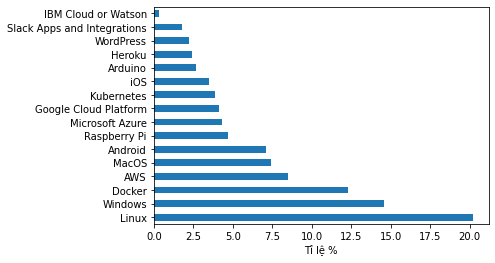

In [28]:
# YOUR CODE HERE
most_loved_platforms.plot.barh()
plt.xlabel('Tỉ lệ %');

Bạn đã hiểu tại sao mình khuyên bạn là nên tập làm quen dần với các câu lệnh của Linux chưa 😉 

---

## Đặt câu hỏi của bạn (1.5đ)

Bây giờ, đến lượt bạn phải tự suy nghĩ và đưa ra câu hỏi mà có thể trả lời bằng dữ liệu. Ngoài việc đưa ra câu hỏi, bạn cũng phải giải thích để người đọc thấy nếu trả lời được câu hỏi thì sẽ có lợi ích gì. Bạn không nên đưa ra câu hỏi cùng dạng với câu hỏi của mình ở trên.  

YOUR ANSWER HERE

**Câu hỏi cảu em là:** Khi gặp khó khăn trong một vấn đề nào đó khi học lập trình, làm việc thì cách giải quyết nào được sử dụng nhiều nhất, cách giải quyết nào được sử dụng nhiều thứ 2, ... và xem những người coder có nhiều kinh nhiệm và ít kinh nghiệm họ thường sử dụng những cách giải quyết nào?

Các cách giải quyết là những lựa chọn ở cột "NEWStuck" (Visit Stack Overflow, Go for a walk or other physical activity, Do other work and come back later, ...)

**Trả lời được câu hỏi này** sẽ phần nào giúp ta có được cách giải quyết tốt nhất khi gặp khó khăn trong một vấn đề nào đó khi học lập trình, làm việc, điều đó giúp ta tiết kiệm thời gian, chi phí, công sức.

## Tiền xử lý để chuẩn bị dữ liệu cho bước phân tích để trả lời cho câu hỏi của bạn

Phần này là không bắt buộc. 

In [29]:
# YOUR CODE HERE (OPTION) 
# Lấy ra tất cả các solutions, years code và index tương ứng của nó
NEWStuckandYearsCode = survey_df[['NEWStuck','YearsCode']].dropna()
NEWStuck = NEWStuckandYearsCode['NEWStuck'].str.split(';').explode()
YearsCode = NEWStuckandYearsCode['YearsCode']
# Ta quy ước những người coder có nhiều kinh nghiệm thì có years code >= median của cột YearsCode
median = np.median(YearsCode)

---

## Phân tích dữ liệu để ra câu trả lời cho câu hỏi của bạn (2đ)

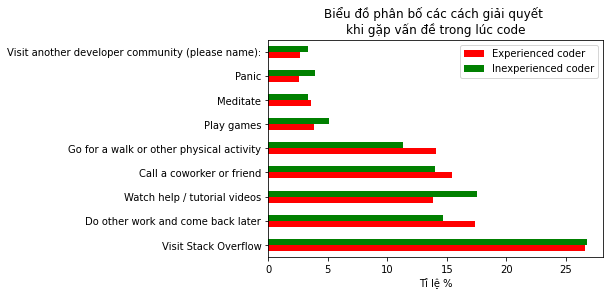

In [30]:
# YOUR CODE HERE
solutions = cat_col_info_df['NEWStuck']['value_ratios'].keys()
res = {}
for i in solutions:    
    a = NEWStuck[NEWStuck == i].index
    b = YearsCode.loc[a]
    res[i] = [len(b[b >= median])]
    res[i].append(len(b[b < median]))
    
temp = res.copy()
# Tính tỷ lệ % của từng solution ứng với nhóm người có nhiều kinh nghiệm và ít kinh nghiệm
res = {i : [round(((temp[i][0] / sum(np.array(list(temp.values())).transpose()[0])) * 100), 1)] for i in temp.keys()}
for i in temp.keys():
    res[i].append(round(((temp[i][1] / sum(np.array(list(temp.values())).transpose()[1])) * 100), 1))

experienced_coder = np.array(list(res.values())).transpose()[0]
inexperienced_coder = np.array(list(res.values())).transpose()[1]
index = res.keys()

solutions = pd.DataFrame({'Experienced coder': experienced_coder,'Inexperienced coder': inexperienced_coder}, index=index)
solutions.plot.barh(color=['red','green'])
plt.title(
'''Biểu đồ phân bố các cách giải quyết 
khi gặp vấn đề trong lúc code''')
plt.xlabel('Tỉ lệ %');
# Qua biểu đồ ta thấy 
# Visit Stack Overflow, Do other work and come back later, 
# Watch help / tutorial videos, Call a coworker or friend
# là những giải pháp mà các coder kể cả có nhiều kinh nghiệm và có ít kinh nghiệm đều sử dụng nhiều nhất.